#  **Sales Performance Analysis on a Dataset from a supermarket**

### **Introduction**: 
This notebook aims to analyze this transactional Dataset, to identify trends and business insights.
The aim is to find useful patterns in customer behavior, top-selling products, and how sales change over time. This includes identifying the best-performing product lines, monthly sales trends, and areas where the business can improve. The results can help the business make better decisions, such as which products to stock more, how to target different types of customers, and when to plan sales or promotions. This helps improve sales, customer satisfaction, and overall business performance.


### **Dataset**: Supermarket sales  
**Source**: [https://www.kaggle.com/datasets/markmedhat/supermarket-sales]  
**Format**: CSV  


### **Context**:
This project analyzes sales data from a supermarket with branches in three different cities. The data set includes information on products sold, customer types, payment methods, and the amount spent, giving a full picture of sales activities over time.

 **Key Concepts**: Aggregation, pivot tables, time-based analysis, product trends.


**Libraries Used**:
- pandas
- matplotlib
- seaborn

**Methods**:
The analysis was done using Python with Pandas for data handling, and Seaborn and Matplotlib for making charts. Techniques used include grouping, pivot tables, and time-based analysis to look at revenue, quantity sold, and profit.

## Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

## Loading Dataset

In [20]:
Supermarket_sales_1 = pd.read_csv('supermarket_sales - Sheet1.csv')

Supermarket_sales_1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Exploring the Dataset

In [22]:

Supermarket_sales_1.info()

Supermarket_sales_1.describe()

Supermarket_sales_1.isnull().sum()

Supermarket_sales_1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Cleaning and Transforming the Dataset

In [24]:
# Renaming the Column for clarity

Supermarket_sales_1.rename(columns={'cogs': 'Cost Of Goods Sold'}, inplace=True)
Supermarket_sales_1.rename(columns={'Total': 'Revenue'}, inplace=True)
Supermarket_sales_1.rename(columns={'gross income': 'Gross Profit'}, inplace=True)

In [25]:
# Replacing non-breaking spaces, removing leading/trailing spaces, capitalizing each word (title case)

Supermarket_sales_1.columns = Supermarket_sales_1.columns.str.replace('\xa0', ' ') \
                                                        .str.strip() \
                                                        .str.title()

In [26]:
# Ensure the 'Date' column is in datetime format
Supermarket_sales_1['Date'] = pd.to_datetime(Supermarket_sales_1['Date'])

In [27]:
# Ensure 'Time' is in datetime format and extract hour
Supermarket_sales_1['Hour'] = pd.to_datetime(Supermarket_sales_1['Time'], format='%H:%M').dt.hour

In [28]:
Supermarket_sales_2 = Supermarket_sales_1

In [29]:
# Move 'Gross_Profit' column to position 14

def move_column(Supermarket_sales_2, col_name, new_position):
    cols = Supermarket_sales_2.columns.tolist()
    cols.insert(new_position, cols.pop(cols.index(col_name)))
    return Supermarket_sales_2[cols]

Supermarket_sales_2 = move_column(Supermarket_sales_2, 'Gross Profit', 14)

In [37]:
# Creating a new column for the day of the week

Supermarket_sales_2.loc[:, 'Day Of Week'] = Supermarket_sales_2['Date'].dt.day_name()

In [31]:
Supermarket_sales_2.head(5)

,Invoice Id,Branch,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Tax 5%,Revenue,Date,Time,Payment,Cost Of Goods Sold,Gross Profit,Gross Margin Percentage,Rating,Hour,Day Of Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,4.761905,9.1,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,4.761905,9.6,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,4.761905,7.4,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,4.761905,8.4,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,4.761905,5.3,10,Friday


In [ ]:
Supermarket_sales_2.columns

In [41]:
Supermarket_sales_3 = Supermarket_sales_2[['City', 'Customer Type', 'Gender', 'Product Line', 'Unit Price', 'Quantity', 'Revenue', 'Date',
        'Payment', 'Cost Of Goods Sold', 'Gross Profit', 'Hour', 'Gross Margin Percentage', 'Rating', 'Day Of Week']]
        

In [43]:
Supermarket_sales_3.loc[:, 'Revenue'] = Supermarket_sales_3['Revenue'].fillna(0).astype(int)
Supermarket_sales_3.loc[:, 'Gross Profit'] = Supermarket_sales_3['Gross Profit'].fillna(0).astype(int)

In [45]:
Supermarket_sales_3.head()

,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Revenue,Date,Payment,Cost Of Goods Sold,Gross Profit,Hour,Gross Margin Percentage,Rating,Day Of Week
0,Yangon,Member,Female,Health and beauty,74.69,7,548.0,2019-01-05,Ewallet,522.83,26.0,13,4.761905,9.1,Saturday
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.0,2019-03-08,Cash,76.40,3.0,10,4.761905,9.6,Friday
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.0,2019-03-03,Credit card,324.31,16.0,13,4.761905,7.4,Sunday
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0,2019-01-27,Ewallet,465.76,23.0,20,4.761905,8.4,Sunday
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.0,2019-02-08,Ewallet,604.17,30.0,10,4.761905,5.3,Friday


# *Analysis*

### 1. Which city or branch performs best in sales?

In [280]:
# Total revenue per city

Supermarket_sales_3.groupby('City')['Revenue'].sum()

City
Mandalay     106032.0
Naypyitaw    110408.0
Yangon       106029.0
Name: Revenue, dtype: float64

In [281]:
# Gross Profit per city
Supermarket_sales_3.groupby('City')['Gross Profit'].sum()

City
Mandalay     4878.0
Naypyitaw    5098.0
Yangon       4885.0
Name: Gross Profit, dtype: float64

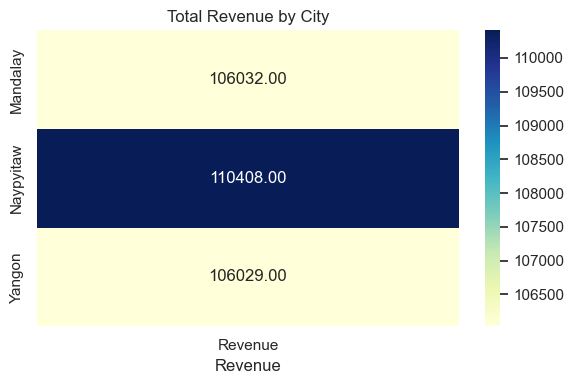

In [284]:
# Pivot to a format suitable for heatmap
revenue_pivot = revenue_by_city.pivot_table(index='City', values='Revenue')

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(revenue_pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Total Revenue by City")
plt.ylabel("")
plt.xlabel("Revenue")
plt.tight_layout()
plt.show()

### 2. Which product lines are selling the most?  By Quantity and by Revenue?

In [286]:
# Group by product line and sum the quantity (most popular roduct line)
top_products_by_quantity = Supermarket_sales_3.groupby('Product Line')['Quantity'].sum().sort_values(ascending=False)

# Display result
print(top_products_by_quantity)

Product Line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


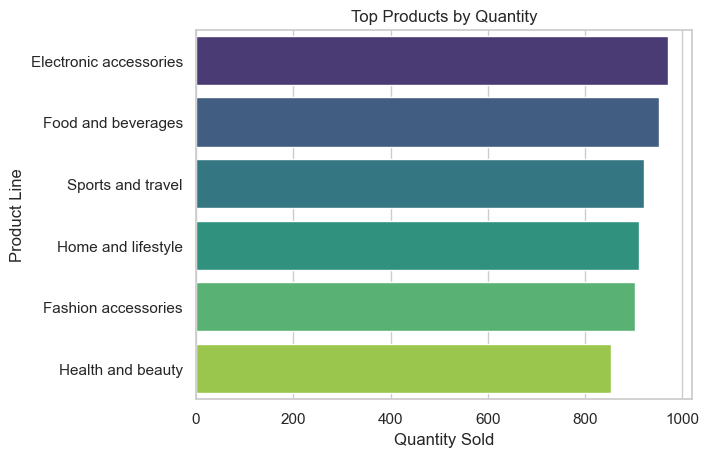

In [287]:
# Plot top product by quantity
sns.barplot(
    x=top_products_by_quantity.values,
    y=top_products_by_quantity.index,
    hue=top_products_by_quantity.index,  
    palette="viridis",
    dodge=False,                          
    legend=False                         
)

plt.title("Top Products by Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Line")
plt.show()

In [289]:
# Group by product line and sum the revenue (most profitable product line)
top_products_by_revenue = Supermarket_sales_3.groupby('Product Line')['Revenue'].sum().sort_values(ascending=False)

# Display result
print(top_products_by_revenue)

Product Line
Food and beverages        56056.0
Sports and travel         55037.0
Electronic accessories    54247.0
Fashion accessories       54223.0
Home and lifestyle        53785.0
Health and beauty         49121.0
Name: Revenue, dtype: float64


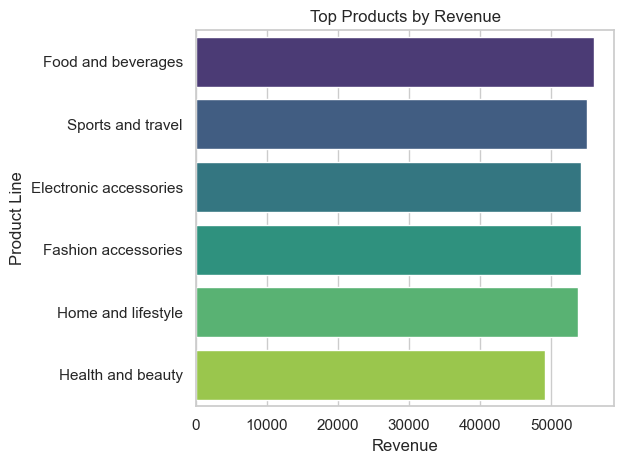

In [290]:
# Plot top product by Revenue
sns.barplot(
    x=top_products_by_revenue.values,
    y=top_products_by_revenue.index,
    hue=top_products_by_revenue.index,  # Assign hue
    palette="viridis",
    dodge=False,
    legend=False  # Hide unnecessary legend
)

plt.title("Top Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()

### 3. What hours, days or months bring the most revenue?

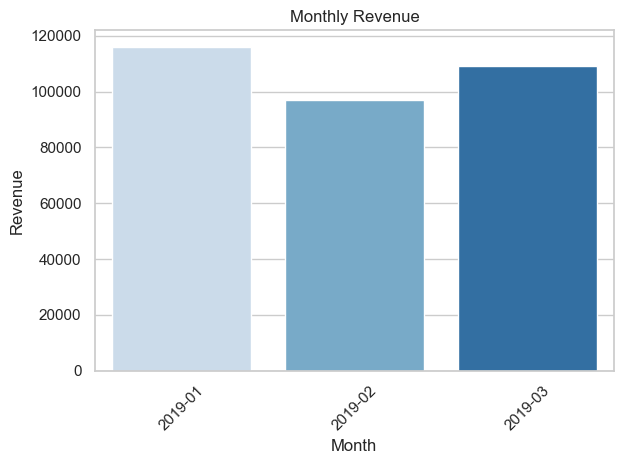

In [303]:
# Month that brought the most revenue

Supermarket_sales_3.loc[:, 'Month'] = Supermarket_sales_3['Date'].dt.to_period('M').astype(str)

# Group by month to get total revenue
monthly_revenue = Supermarket_sales_3.groupby('Month', as_index=False)['Revenue'].sum()

sns.barplot(data=monthly_revenue, x='Month', y='Revenue', hue='Month', palette='Blues', legend=False)
plt.title("Monthly Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

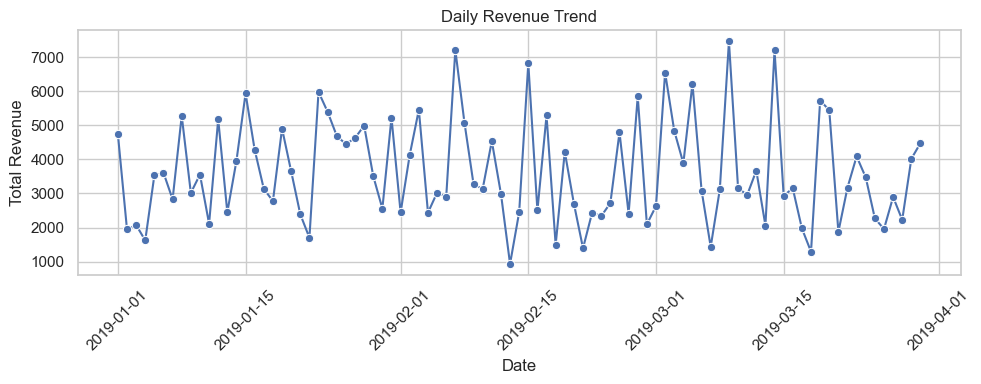

In [427]:
# Days that bring the most revenue

# Group by exact day
daily_revenue = Supermarket_sales_3.groupby('Date')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=daily_revenue, x='Date', y='Revenue', marker='o')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

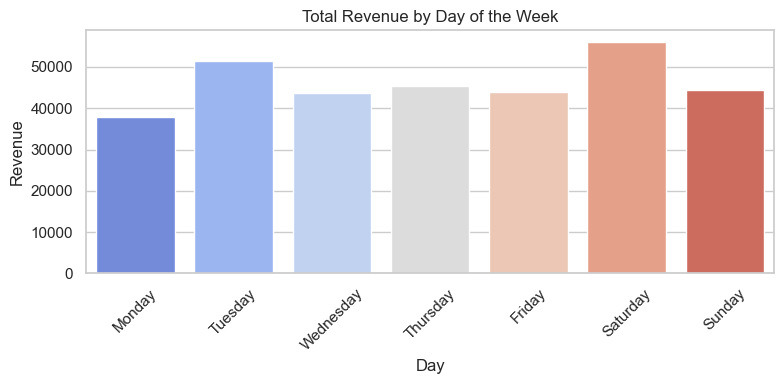

In [349]:
# Days of the week that bring the most revenue
# Group by Day Of Week and get total revenue

day_revenue = Supermarket_sales_3.groupby('Day Of Week')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=day_revenue, x='Day Of Week', y='Revenue', hue='Day Of Week', palette='coolwarm', legend=False)
plt.title("Total Revenue by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

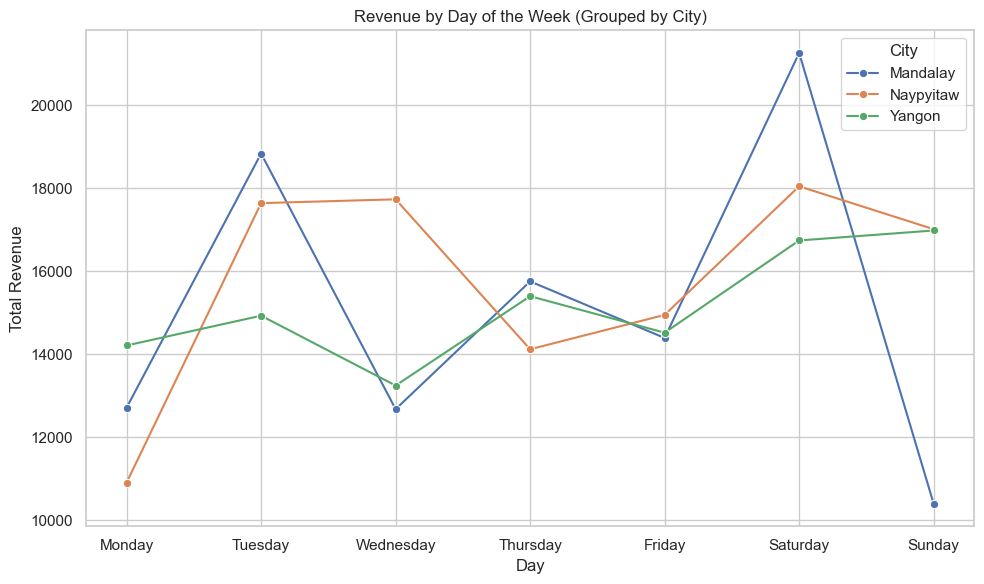

In [429]:
# Days of the week that bring the most revenue in each city
# Group by Day Of Week and City

city_day = Supermarket_sales_3.groupby(['Day Of Week', 'City'])['Revenue'].sum().reset_index()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
city_day['Day Of Week'] = pd.Categorical(city_day['Day Of Week'], categories=ordered_days, ordered=True)
city_day = city_day.sort_values('Day Of Week')

plt.figure(figsize=(10, 6))
sns.lineplot(data=city_day, x='Day Of Week', y='Revenue', hue='City', marker='o')
plt.title("Revenue by Day of the Week (Grouped by City)")
plt.xlabel("Day")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

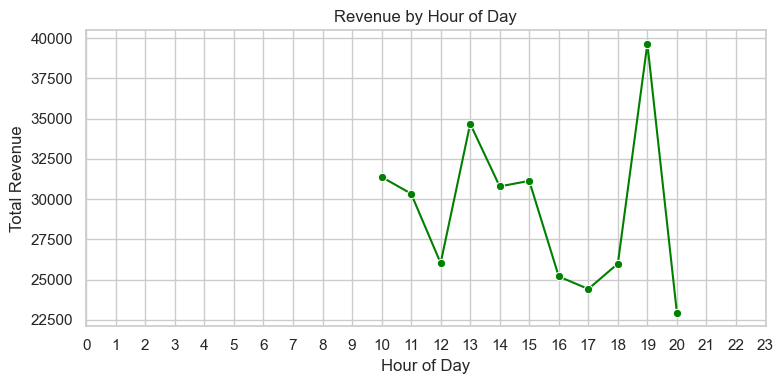

In [425]:
# Hours that bring the most revenue
# Group by Hour and sum Revenue

hourly_revenue = Supermarket_sales_3.groupby('Hour')['Revenue'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=hourly_revenue, x='Hour', y='Revenue', marker='o', color='green')
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

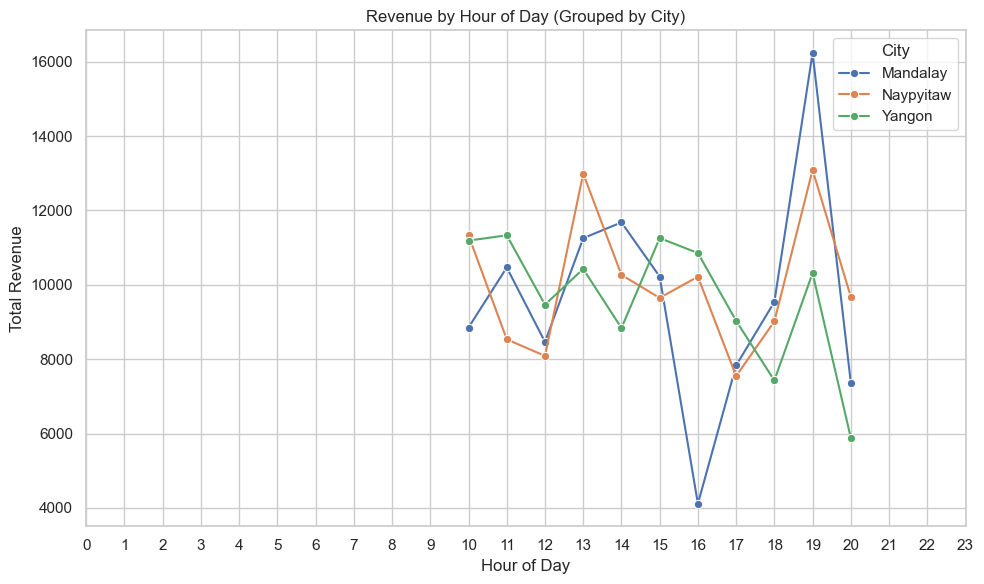

In [351]:
# Hours that bring the most revenue in each city
# Group by Hour and City

hour_city = Supermarket_sales_3.groupby(['Hour', 'City'])['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_city, x='Hour', y='Revenue', hue='City', marker='o')
plt.title("Revenue by Hour of Day (Grouped by City)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Who are the customers (Gender, Customer Type) and what do they buy?

In [419]:
# Pivot table showing sum of Gender type and Customer Type

pivot_gender_customer = pd.pivot_table(
    Supermarket_sales_3,
    index='Gender',
    columns='Customer Type',
    aggfunc='size',
    margins_name='Total'
)

print(pivot_gender_customer)

Customer Type  Member  Normal
Gender                       
Female            261     240
Male              240     259


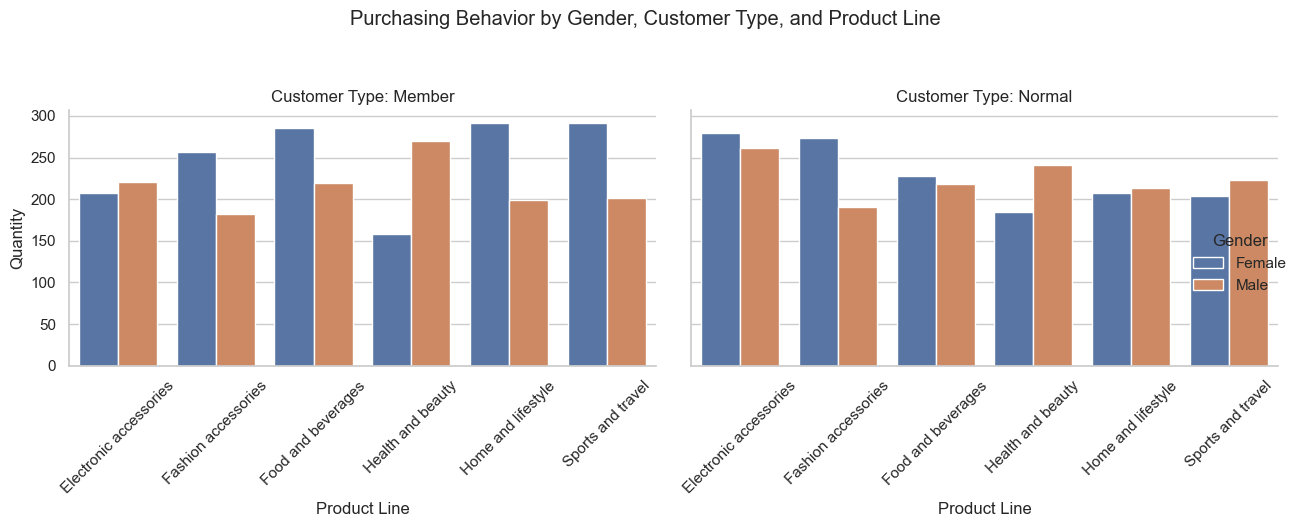

In [375]:
# Purchasing behaviour by gender and customer type

customer_behavior = Supermarket_sales_3.groupby(['Gender', ''Product Line'])['Quantity'].sum().reset_index()

g = sns.catplot(data=customer_behavior, 
                x='Product Line', 
                y='Quantity', 
                hue='Gender', 
                col='Customer Type',
                kind='bar', 
                height=5, aspect=1.2)

g.set_xticklabels(rotation=45)
g.set_titles("Customer Type: {col_name}")
g.fig.suptitle("Purchasing Behavior by Gender, Customer Type, and Product Line", y=1.05)
plt.tight_layout()
plt.show()

### 5. What is the average customer rating per product line or branch?

In [68]:
# Creating a pivot table for average rating per product line
avg_rating_product_pivot = Supermarket_sales_3.pivot_table(
    index='Product Line',
    values='Rating',
    aggfunc='mean'
).sort_values(by='Rating', ascending=False)

print(avg_rating_product_pivot)

                          Rating
Product Line                    
Food and beverages      7.113218
Fashion accessories     7.029213
Health and beauty       7.003289
Electronic accessories  6.924706
Sports and travel       6.916265
Home and lifestyle      6.837500


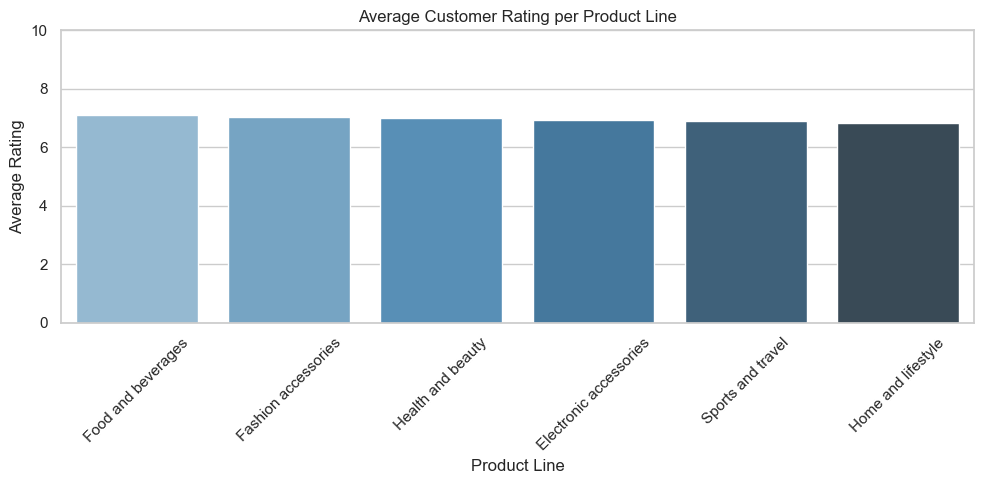

In [423]:
# Average customer rating per product line

avg_rating_product = Supermarket_sales_3.groupby('Product Line')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_rating_product.index,
    y=avg_rating_product.values,
    hue=avg_rating_product.index,  # mimic grouping
    palette="Blues_d",
    legend=False
)
plt.title("Average Customer Rating per Product Line")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

In [65]:
# Creating a pivot table for average rating per city
avg_rating_city_pivot = Supermarket_sales_3.pivot_table(
    index='City',
    values='Rating',
    aggfunc='mean'
).sort_values(by='Rating', ascending=False)

print(avg_rating_city_pivot)

             Rating
City               
Naypyitaw  7.072866
Yangon     7.027059
Mandalay   6.818072


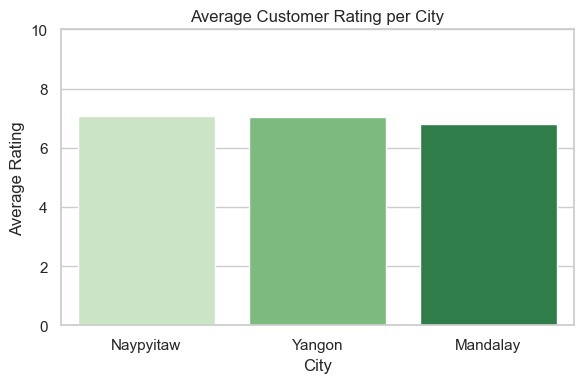

In [436]:
# Average customer rating city

avg_rating_city = Supermarket_sales_3.groupby('City')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(
    x=avg_rating_city.index,
    y=avg_rating_city.values,
    hue=avg_rating_city.index,
    palette="Greens",
    legend=False
)
plt.title("Average Customer Rating per City")
plt.ylabel("Average Rating")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

### 6. What is the top payment methods used?

In [438]:
# Creating a pivot table for value counts of payment methods

payment_counts = Supermarket_sales_3['Payment'].value_counts()
print(payment_counts)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


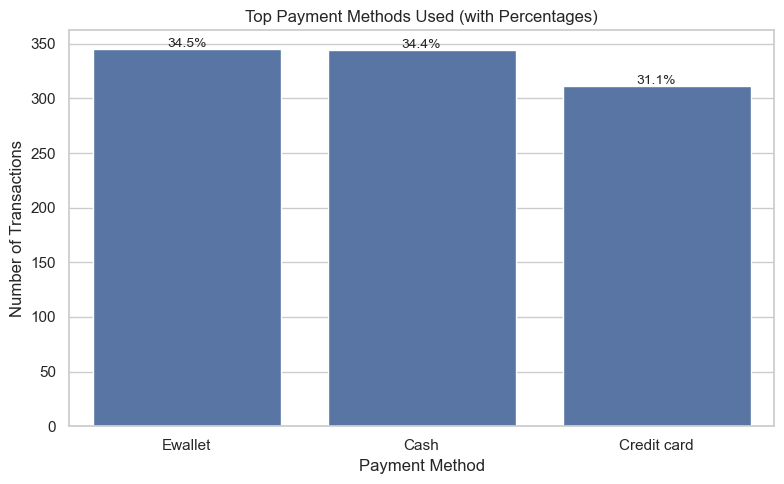

In [444]:
# Creating a chart for value counts of payment methods and percentage

payment_counts = Supermarket_sales_3['Payment'].value_counts()
payment_percent = (payment_counts / payment_counts.sum()) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)

for i, (count, pct) in enumerate(zip(payment_counts.values, payment_percent.values)):
    plt.text(i, count + 2, f'{pct:.1f}%', ha='center', fontsize=10)

plt.title("Top Payment Methods Used (with Percentages)")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

### 7. Checking the Gross profit across all product line

In [452]:
# Checking the average values to have an idea of the profit margins across the dataset.

Supermarket_sales_3[['Unit Price', 'Cost Of Goods Sold', 'Gross Profit', 'Gross Margin Percentage']].describe()


,Unit Price,Cost Of Goods Sold,Gross Profit,Gross Margin Percentage
count,1000.000000,1000.00000,1000.000000,1.000000e+03
mean,55.672130,307.58738,15.379369,4.761905e+00
std,26.494628,234.17651,11.708825,6.131498e-14
min,10.080000,10.17000,0.508500,4.761905e+00
25%,32.875000,118.49750,5.924875,4.761905e+00
50%,55.230000,241.76000,12.088000,4.761905e+00
75%,77.935000,448.90500,22.445250,4.761905e+00
max,99.960000,993.00000,49.650000,4.761905e+00


In [468]:
# Calculatiing average Gross Margin Percentage by Product Line

avg_margin = Supermarket_sales_3.groupby('Product Line')['Gross Margin Percentage'].mean().sort_values(ascending=False)
print(avg_margin)

Product Line
Electronic accessories    4.761905
Fashion accessories       4.761905
Food and beverages        4.761905
Health and beauty         4.761905
Home and lifestyle        4.761905
Sports and travel         4.761905
Name: Gross Margin Percentage, dtype: float64


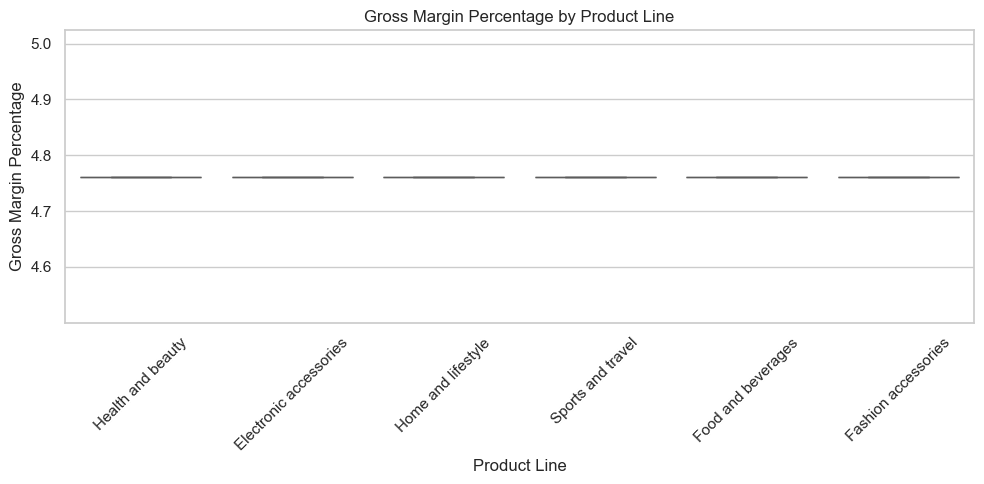

In [466]:
# Representing the Gross Margin Percentage by Product Line

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=Supermarket_sales_3,
    x='Product Line',
    y='Gross Margin Percentage',
    hue='Product Line',      
    palette='coolwarm',
    legend=False            
)
plt.title("Gross Margin Percentage by Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
# Setting thresholds 

Supermarket_sales_3.loc[:, 'Profit Per Unit'] = (
    Supermarket_sales_3['Gross Profit'] / Supermarket_sales_3['Quantity']
)
Supermarket_sales_3.loc[:, 'Highly Profitable'] = (
    Supermarket_sales_3['Profit Per Unit'] > 10
)

In [536]:
# Performing summary counts to know Inefficiently Priced Items and Highly Profitable Items

print("Inefficiently Priced Items:", Supermarket_sales_3['Inefficient Pricing'].sum())
print("Highly Profitable Items:", Supermarket_sales_3['Highly Profitable'].sum())

Supermarket_sales_3[['Product Line', 'Unit Price', 'Gross Profit', 'Gross Margin Percentage', 
                     'Inefficient Pricing', 'Highly Profitable']].head()

Inefficiently Priced Items: 0
Highly Profitable Items: 0


,Product Line,Unit Price,Gross Profit,Gross Margin Percentage,Inefficient Pricing,Highly Profitable
0,Health and beauty,74.69,26.0,4.761905,False,False
1,Electronic accessories,15.28,3.0,4.761905,False,False
2,Home and lifestyle,46.33,16.0,4.761905,False,False
3,Health and beauty,58.22,23.0,4.761905,False,False
4,Sports and travel,86.31,30.0,4.761905,False,False


# *Insights*

#### 1. Branch C in Naypyitaw City produces the highest revenue; therefore they have the best performance in sales.

#### 2.  Advertisements and promotional deals should be carried out for Hair and beauty product line because it is the least product line by Quantity and by Revenue

#### 3.  The supermarkets should organize promotional deals that would take place during the day, especially on weekdays to attract customers. They can also include delivery services during these periods to increase sales e.g. food and beverages product line etc.

#### 4. Among the two customer types, males buy less fashion accessories and food and beverages products, while females buy less health and beauty products. 
#### The supermarket should arrange more advertisements on male centered fashion accessories and food and beverages products. In the case of females, they should do more female centered promotions on health and beauty products.

#### 5. Investigations should be done on product lines with lower customer ratings (electronic accessories, sport and travel and home and lifestyle products) to know the challenges Customers have with them eg check the quality of the products. 
#### The branch in Mandalay city (branch B) should be investigated to know the problems customers are facing there. These investigations can be done out by carrying out a customer satisfaction surrvey.

#### 6. The customers use Ewallet and cash payment method more than credit card, probably because it’s more convenient. 

#### 7. Products have moderate margins and profits across the board. This will prevent low profit from any product line and overpricing of any product.

### **Key Takeaway**

#### Branch C in Naypyitaw makes the most money, while some product types especially Hair and Beauty sell less and need special promotions. Gender-based marketing can improve sales in specific product line, so marketing should be tailored for each group. Sales can also improve by offering weekday deals and delivery options. Some products, like electronics and travel items, and Branch B in Mandalay, may have customer issues that need to be looked into. Most people prefer using Ewallet or cash, and prices across products seem fair, which helps avoid low profits or overpricing.